<a href="https://colab.research.google.com/github/Domenikos/Digital_Convolution/blob/main/Digital_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital Convolution
##Introduction
Convolution is the mathematical operation that combines two functions to obtain a third.  It can be applied to both continuous time and as well as discrete time signals.  Convolution of discrete time signals will be consider here.  

##Mathematical Definition
Digital Convolution is a mathematical operation that maps two discrete-time sequences, x(n) and h(n), into a third discrete-time sequence, y(n).
\begin{equation}
\begin{split}
 y(n) &= h(n) \ast x(n)  \;\;\;\;\;-\infty < n < \infty \\
 y(n) &= \sum_{k=-\infty}^{\infty}h(k) x(n-k)
\end{split}
\end{equation}
Where y(n) is the resultant of the *convolutional sum* of h(n) with x(n). _[where $\ast$ represents the convolutional operator]_.

If both sequences are causal, that is $x(n) = h(n) = 0 \;\;\forall \;\;n \lt 0$, then the limits on the summation are restrained between 0 and n.
\begin{equation}
\begin{split}
 y(n) &= h(n) \ast x(n) = \sum_{k=0}^{n}h(k) x(n-k) \;\;\;\forall\;n \ge 0
\end{split}
\end{equation}

Convolution can best be described by examples.  Consider a patient who receives medication over several consecutive days with a different dose each day.  We will see that the number of units of medication administered to a group of patients over several days can be obtained from the convolution of medication dosage regime with the patient population.

In another example, assume you have two fair dice.  When the dice are rolled, the probability that any number 1 to 6 appears as the face value is 1/6 since there is an equal probability that any will appear.  Therefore, the sum of the face values of the two dice will be in the range between two and twelve where two is the result of two ones and twelve is two sixes.  It will be shown that the face value sum is the convolution of the two sequences with elements [1/6,1/6,1/6,1/6,1/6,1/6].

##Medication Example
Let us first consider the following examples that will show how _convolution_ describes the amount of medication required for a group of patients over a series of a few days.

In [1]:
# First Load Required Libraries
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

##Daily Medication Delivered
The medication administered daily can be obtained from the number of patients admitted each day combined with the units of medication administered each day.  Assume the medication was given to each patient over a three day sequence. 

On the initial day: the units of medication administered, y(0), is obtained from the number of patients admitted on the initial day, x(0), times units of medication for the initial day, h(0) **_(indexing begins with 0 corresponding to initial day)_**.

On the following day: the units of medication administered, y(1), is obtained from the patients admitted on following day, x(1), times the units of medication received for their initial day's dosage, h(0), plus the patients admitted on the initial day, x(0), times the units of medication for their following day's dosage, h(1).  The number of units of medication administered for each day is defined by the following equations.  The medication is administered to each patient over three consecutive days.

* Daily medication units, y(n), obtained from h(n) _(daily medication units)_ and x(n) _(daily patient admissions)_

\begin{equation}
\begin{split}
 y(0) &= h(0) x(0)\\
 y(1) &= h(0) x(1) + h(1) x(0)\\
 y(2) &= h(0) x(2) + h(1) x(1) + h(2) x(0) \\
 y(3) &= h(0) x(3) + h(1) x(2) + h(2) x(1) \\
& \vdots \\
 y(n) &= \sum_{k=0}^{n}h(k) x(n-k)
\end{split}
\end{equation}
* The daily units of medication y(n) is the **convolution** of x(n) with h(n)
* **Commutative** Property of Convolution _(order independent)_.  As can be observed, convolution is independent of the order.
\begin{equation}
\begin{split}
 y(0) &= h(0) x(0) = x(0) h(0)\\
 y(1) &= h(0) x(1) + h(1) x(0) = x(0) h(1) + x(1) h(0)\\
 y(2) &= h(0) x(2) + h(1) x(1) + h(2) x(0) = x(0) h(2) + x(1) h(1) + x(2) h(0)\\
 & \vdots \\
 y(n) &= \sum_{k=0}^{n}h(k) x(n-k) = \sum_{k=0}^{n} x(k)h(n-k) = h(n) \ast x(n) = x(n) \ast h(n)
\end{split}
\end{equation}
 _[where $\ast$ represents the convolutional operator]_
* In Block Diagram Form

 $$x(n) \longrightarrow \boxed{\\h(n)} 
\longrightarrow y(n)$$

###Daily Medication Units Administered
A group of patients were admitted on several consecutive days, and each patient receive medication on the day of admission and several consecutive days.  The number of patients admitted each day is contained in the array x, and the units of medication administered each day is defined by the array h.

In [2]:
# Next Enter Example Data
# Input, x, in this exmaple, the number of patients receiving medication each day
# One patient on the initial day, two patients on the following day, ...
x = [1, 2, 3, 4]
# The units of medicine administered once a day per patient for a three day sequence
h = [3, 2, 1]

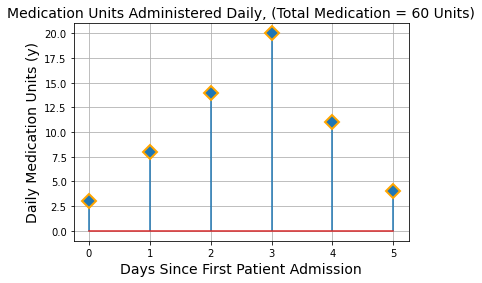

Daily Patient Admissions       : x(n) = [1, 2, 3, 4]
Daily Medication Dosage        : h(n) = [3, 2, 1]
Daily Medication Admisistered  : y(n) = h(n) * x(n) = [ 3  8 14 20 11  4]


In [3]:
# Convolve h with x to find the daily medication distribution
y = np.convolve(h,x)        # medication units per day
med_total = np.sum(y)       # total medication
n = np.array(range(0,len(y)))   # the day sequence starting with 0
fig = plt.figure()
(markers, stemlines, baseline) = plt.stem(n,y,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Days Since First Patient Admission', fontsize = 14)
plt.ylabel('Daily Medication Units (y)', fontsize = 14)
plt.title('Medication Units Administered Daily, (Total Medication = '+str(med_total)+' Units)',
          fontsize = 14)
plt.show()
print('Daily Patient Admissions       : x(n) =',x)
print('Daily Medication Dosage        : h(n) =',h)
print('Daily Medication Admisistered  : y(n) = h(n) * x(n) =',y)

##Verify Linearity of the Convolution Operator
Linear operators must satisfy both **additivity** and **homogeneity** (scaling) properties.  First consider scaling.

###Double the Number of Patients

### Twice the Patients Doubles the Medication
If the number of patients is scaled by a constant factor each day, the medication administered is increased by that same amount.  In the example shown below, the number of patients scalede by a factor of two.
\begin{equation}
\begin{split}
 y_{scaled} (n) &= h(n) \ast (2\times x(n)) = 2\times (h(n) \ast x(n)) = 2\times y(n)\\
 y_{scaled} (n) &= \sum_{k=0}^{n}h(k) (2\times x(n-k)) = 2\times \sum_{k=0}^{n} h(k)x(n-k) = 2\times y(n)
\end{split}
\end{equation}
Scaling the input, scales the output by the same factor which satisfies the **homogeneity** (or **scaling**) property of convolution.

Day Sequence                                        : [0 1 2 3 4 5]
Daily Units Administered with Initial Patient Group : [ 3  8 14 20 11  4]
Daily Units Administered with Twice the Patients    : [ 6 16 28 40 22  8]

Graphical Format


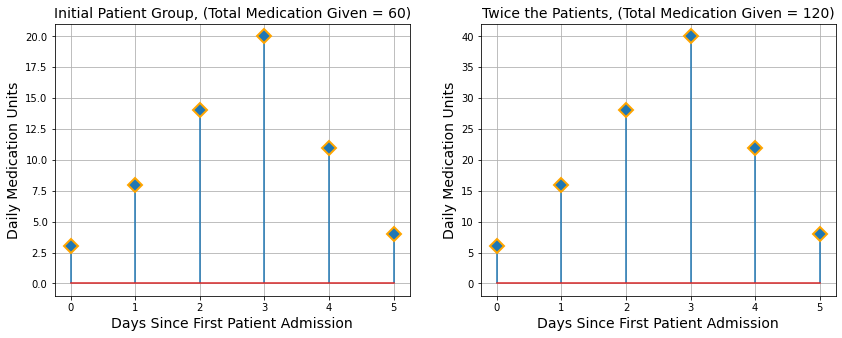

In [4]:
xD = np.array(x)*2      # Double the number of patients
yD = np.convolve(h,xD)
print('Day Sequence                                        :',n)
print('Daily Units Administered with Initial Patient Group :',y)
print('Daily Units Administered with Twice the Patients    :',yD)
print('\nGraphical Format')
dict = {'y':y,'y_D':yD}
med_total = np.sum(y)
df = pd.DataFrame(dict)
df.style

plt.figure(figsize=[14, 5])
plt.subplot(1, 2, 1)
(markers, stemlines, baseline) = plt.stem(n,y, use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Days Since First Patient Admission', fontsize = 14)
plt.ylabel('Daily Medication Units', fontsize = 14)
plt.title('Initial Patient Group, (Total Medication Given = '+str(med_total)+')',
          fontsize = 14)
#plt.show()
plt.subplot(1, 2, 2)
med_total = np.sum(yD)
(markers, stemlines, baseline) = plt.stem(n,yD,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Days Since First Patient Admission', fontsize = 14)
plt.ylabel('Daily Medication Units', fontsize = 14)
plt.title('Twice the Patients, (Total Medication Given = '+str(med_total)+')',
          fontsize = 14)
plt.show()


###Next Consider the Additivity Property
###Add a Second Group of Patients

###Medication Requirement for Two Groups of Patients
* $x_1$ - patient group 1, $x_2$ - patient group 2, h - medication dosage

\begin{equation}
\begin{split}
 y_{1 + 2} (n) &= h(n) \ast (x_1(n)+x_2(n)) = h(n) \ast x_1(n) + h(n) \ast x_2(n)\\
 y_{1 + 2} (n) &= y_1(n) + y_2(n)
\end{split}
\end{equation}

* The medication required from the combination (sum) of two groups of patients is equivalent to the sum of the medication given to each group individually.  
* Convolution satisfies the **additivity** propperty.
* Convolution is a **linear** operation since it meets both the **additivity** and **homogeneity** (scaling) properties.


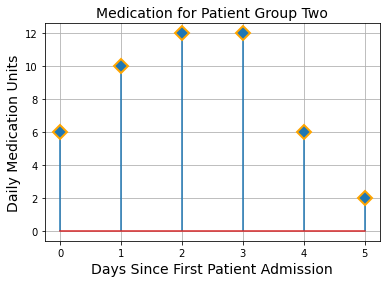

In [5]:
x2 = np.ones(len(x))*2  # Group 2
y2 = np.convolve(h,x2)  # units per day
n = np.array(range(0,len(y2)))
(markers, stemlines, baseline) = plt.stem(n, y2, use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Days Since First Patient Admission', fontsize = 14)
plt.ylabel('Daily Medication Units', fontsize = 14)
plt.title('Medication for Patient Group Two', fontsize = 14)
plt.show()

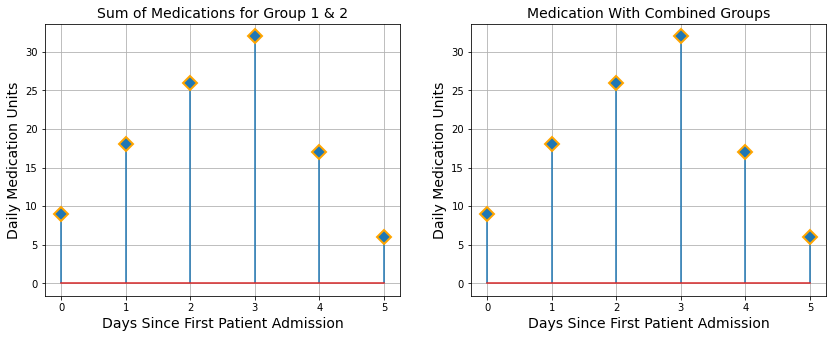

In [6]:
x1 = x
y1_2 = np.convolve(h,np.array(x1)+np.array(x2))
y1 = y
y1py2 = np.array(y1) + np.array(y2)

plt.figure(figsize=[14, 5])
plt.subplot(1, 2, 1)
(markers, stemlines, baseline) = plt.stem(n, y1py2, use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Days Since First Patient Admission', fontsize = 14)
plt.ylabel('Daily Medication Units', fontsize = 14)
plt.title('Sum of Medications for Group 1 & 2', fontsize = 14)
plt.subplot(1, 2, 2)
(markers, stemlines, baseline) = plt.stem(n, y1_2, use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Days Since First Patient Admission', fontsize = 14)
plt.ylabel('Daily Medication Units', fontsize = 14)
plt.title('Medication With Combined Groups', fontsize = 14)
plt.show()

###Medication Requirement for Two Groups of Patients

* The medication required from the combination (sum) of two groups of patients is equivalent to the sum of the medication given to each group individually.  
* Convolution satisfies the **additivity** propperty.
* Convolution is a **linear** operation since it meets both the **additivity** and **homogeneity** (scaling) properties.

##Associative and Distributive Properties

In addition to linearity and commutative property, the convolution operator exhibits **associative** and **distributive** properties.

First consider the distributive property.

##Distributed Property
###Medication Administered BID (Morning and Evening)
* Separating Morning and Evening Medication

\begin{equation}
\begin{split}
 y_{Morning} (n) &= h_{Morning}(n) \ast x(n)\\
 y_{Evening} (n) &= h_{Evening}(n) \ast x(n)\\
 y_{Daily Total (BID)} &= (h_{Morning}(n) * x(n) + h_{Evening}(n) \ast x(n)) = (h_{Morning}(n) + h_{Evening}(n)) \ast x(n)
\end{split}
\end{equation}

* $h_{Morning}(n)$ - Morning Medication, $h_{Evening}(n)$ - Evening Medication, x(n) - Patient Admissions
* This is the **Distributive** Property of Convolution.


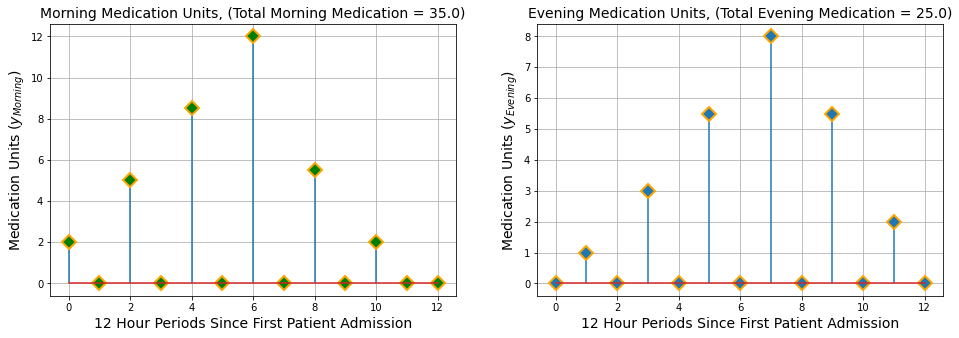

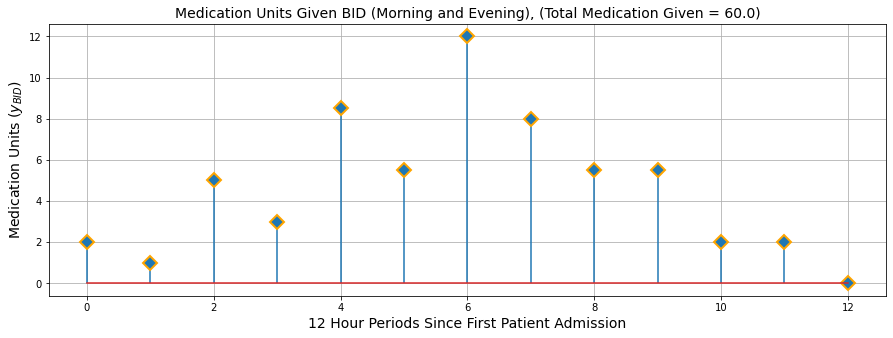

In [7]:
# Medication Administered Twice a Day
#  h2d = [morning day 1, evening day 1, morning day 2, evening day 2, ... ]
#  h2d[morning day 1] = (2/3)*h[day 1]
#  h2d[evening day 1] = (1/3)*h[day 1]
#  h2d[morning and evening following days] = (1/2) * h[daily dose]
#  x2d = [morning admission day 1, evening admission day 1, ... ]
#     patients admitted once a day
h2d = np.zeros(2*len(h))
h2d[::2] = h                      # Medication units administrated BID
h2d = (h2d + np.roll(h2d,1))/2
h2d[0] = 4*h2d[0]/3
h2d[1] = 2*h2d[1]/3
x2d = np.zeros(2*len(x))
x2d[::2] = x                      # Patients admits on 12 hour intervals

#h2d = [2, 1, 1, 1, 1/2, 1/2]     # Medication units administrated BID
#x2d = [1, 0, 2, 0, 3, 0, 4, 0]    # Patients admits on 12 hour intervals

y2d = np.convolve(h2d,x2d)
med_total = np.sum(y2d)
n2d = np.array(range(0,len(y2d)))

# Separate Morning and Evening Medication
#h2dM = [2, 0, 1, 0, 1/2, 0]     # Medication units administrated Morning
h2dM = np.copy(h2d)
for index in range(1,len(h2dM),2):
  h2dM[index] = 0
#h2dE = [0, 1, 0, 1, 0, 1/2]     # Medication units administrated Evening
h2dE = np.copy(h2d)
for index in range(0,len(h2dE),2):
  h2dE[index] = 0
#x2d = [1, 0, 2, 0, 3, 0, 4, 0]    # Patients admits on 12 hour intervals

y2dM = np.convolve(h2dM,x2d)
y2dE = np.convolve(h2dE,x2d)
med_totalM = np.sum(y2dM)
med_totalE = np.sum(y2dE)
n2d = np.array(range(0,len(y2d)))
#fig = plt.figure()
plt.figure(figsize=[16, 5])
plt.subplot(1, 2, 1)

(markers, stemlines, baseline) = plt.stem(n2d,y2dM,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2,mfc="green")
plt.grid()
plt.xlabel('12 Hour Periods Since First Patient Admission', fontsize = 14)
plt.ylabel('Medication Units ($y_{Morning}$)', fontsize = 14)
plt.title('Morning Medication Units, (Total Morning Medication = '+str(med_totalM)+')',
          fontsize = 14)
#plt.show()
#fig = plt.figure()
plt.subplot(1, 2, 2)

(markers, stemlines, baseline) = plt.stem(n2d,y2dE,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('12 Hour Periods Since First Patient Admission', fontsize = 14)
plt.ylabel('Medication Units ($y_{Evening}$)', fontsize = 14)
plt.title('Evening Medication Units, (Total Evening Medication = '+str(med_totalE)+')',
          fontsize = 14)
plt.show()

fig = plt.figure(figsize=[15, 5])
(markers, stemlines, baseline) = plt.stem(n2d,y2d,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('12 Hour Periods Since First Patient Admission', fontsize = 14)
plt.ylabel('Medication Units ($y_{BID}$)', fontsize = 14)
plt.title('Medication Units Given BID (Morning and Evening), (Total Medication Given = '+str(med_total)+')',
          fontsize = 14)
plt.show()

##Associative Property of Convolution
The relationship between the input and output of a system with cascaded processes is independent of the order in which the processes occur.

###Consider Two Separate Processes

Cascading two systems, $h_1(n)$ and $h_2(n)$, in the first equation the input, x(n), is convolved with $h_1(n)$ followed by the convolution with $h_2(n)$.  In the second, the input, x(n), is convolved with $h_2(n)$ followed by the convolution with $h_1(n)$.  The result is independent of the order of convolution.  This is the **associative** property of convolution.
\begin{equation}
\begin{split}
 y (n) &= h_2(n) \ast (h_1(n) \ast x(n)) = h_2(n) \ast w_1(n) \\
 y (n) &= h_1(n) \ast (h_2(n) \ast x(n)) = h_1(n) \ast w_2(n) \\
 y (n) &= (h_1(n) \ast h_2(n)) \ast x(n)
\end{split}
\end{equation}
* In block diagram form:
$$x(n) \longrightarrow \boxed{\\h_1(n)} \stackrel{w_1(n)}
\longrightarrow \boxed{\\h_2(n)} \longrightarrow y(n)$$
And
$$x(n) \longrightarrow \boxed{\\h_2(n)} 
\stackrel{w_2(n)} \longrightarrow \boxed{\\h_1(n)} \longrightarrow y(n)$$
Equivalent to
$$x(n) \longrightarrow \boxed{\\h_1(n) \ast h_2(n)} 
\longrightarrow y(n)$$

###Example: Probability Density Function for Three Dice
The probability that the number 1 to 6 is obtained from a single *fair* die is p = 1/6. For two dice the probability of the sum of their values is the convolution of the sequences p<sub>1</sub> = p<sub>2</sub> = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] where these are the probabilities that the number on the die is [1, 2, 3, 4, 5, or 6].  There is one combination for the sum = 2: [(1,1)], p=(1/6)(1/6)=1/36. There are two combinations for the sum = 3: [(1,2), (2,1)], p=(2/36). and three possibilities for sum = 4: [(1,3), (2,2), (3,1)], p=(3/36).

If a third die is included in the roll, the sum of their values will be in the range (3 to 18).  Assume the third die in *biased* such that the probability of a one is 1/2 and the probabilities of 2 through 6 is 1/10.  The Probability Density Function (pdf) for the sum of the values on the three dice is
\begin{equation}
\begin{split}
 pdf (n) &= (p_1(n) \ast p_2(n)) \ast p_3(n) \\
 pdf (n) &= (p_1(n) \ast p_3(n)) \ast p_2(n)
\end{split}
\end{equation}

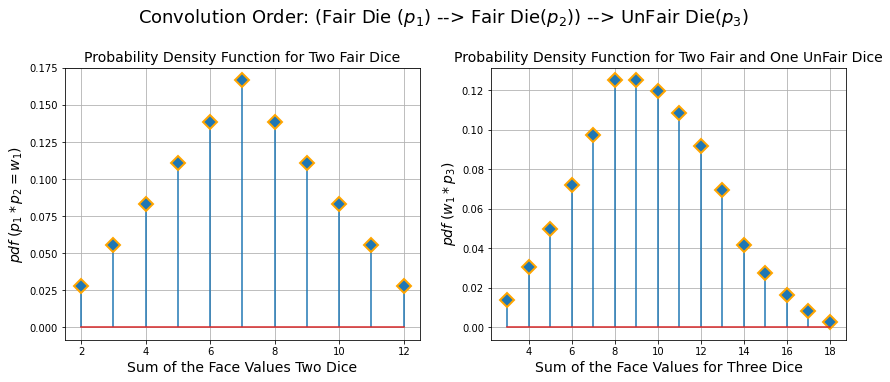

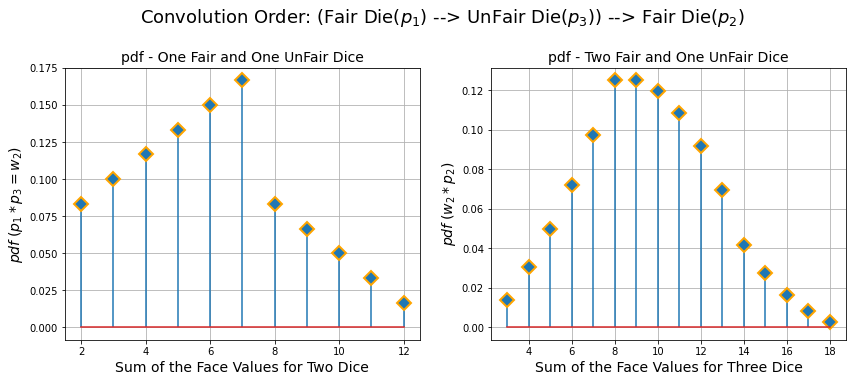


The final probability density functions (pdf) are independent of order of convolution.


In [8]:
# Fair die with equal probabilities for the face value [1, 2, 3, 4, 5, 6]
p1 = p2 = [1/6,1/6,1/6,1/6,1/6,1/6]
# Unfair die probability density function for the face value [1, 2, 3, 4, 5, 6]
p3 = [.5,.1,.1,.1,.1,.1]
w1 = np.convolve(p1,p2)     # odf for two fair dice
y12 = np.convolve(p3,w1)    # pdf for two fair and one unfair dice
w2 = np.convolve(p1,p3)     # pdf of one fair with one unfair dice
y21 = np.convolve(p2,w2)    # pdf for two fair and one unfair dice
n1 = np.array(range(2,len(w1)+2)) # sum of the face values for two dice
n = np.array(range(3,len(y12)+3)) # sum of the face values for three dice

plt.figure(figsize=[14, 5])
plt.suptitle('Convolution Order: (Fair Die ($p_1$) --> Fair Die($p_2$)) --> UnFair Die($p_3$)',
             y = 1.05, fontsize = 18)
plt.subplot(1, 2, 1)
(markers, stemlines, baseline) = plt.stem(n1,w1,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Sum of the Face Values Two Dice',fontsize = 14)
plt.ylabel('$pdf \;(p_1*p_2 = w_1)$',fontsize = 14)
plt.title('Probability Density Function for Two Fair Dice',fontsize = 14)
plt.subplot(1, 2, 2)
(markers, stemlines, baseline) = plt.stem(n,y12,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Sum of the Face Values for Three Dice',fontsize = 14)
plt.ylabel('$pdf\;(w_1*p_3)$',fontsize = 14)
plt.title('Probability Density Function for Two Fair and One UnFair Dice',fontsize = 14)
plt.show()

plt.figure(figsize=[14, 5])
plt.suptitle('Convolution Order: (Fair Die($p_1$) --> UnFair Die($p_3$)) --> Fair Die($p_2$)',
             y = 1.05, fontsize = 18)
plt.subplot(1, 2, 1)
(markers, stemlines, baseline) = plt.stem(n1,w2,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Sum of the Face Values for Two Dice',fontsize = 14)
plt.ylabel('$pdf \;(p_1*p_3 = w_2)$',fontsize = 14)
plt.title('pdf - One Fair and One UnFair Dice',fontsize = 14)
plt.subplot(1, 2, 2)
(markers, stemlines, baseline) = plt.stem(n,y21,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Sum of the Face Values for Three Dice',fontsize = 14)
plt.ylabel('$pdf\;(w_2*p_2)$',fontsize = 14)
plt.title('pdf - Two Fair and One UnFair Dice',fontsize = 14)
plt.show()
print('\nThe final probability density functions (pdf) are independent of order of convolution.')


###Compare the probability density function for three fair vs three dice with one unfair dice

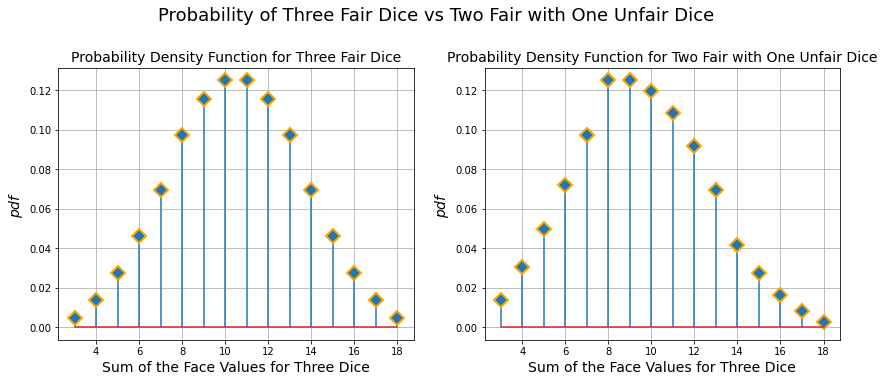


The pdf of the three fair dice on the left vs pdf with two fair and one unfair dice on the right


In [9]:
# Fair die with equal probabilities for the face value [1, 2, 3, 4, 5, 6]
p1 = p2 = [1/6,1/6,1/6,1/6,1/6,1/6]
# Unfair die probability density function for the face value [1, 2, 3, 4, 5, 6]
p3 = [.5,.1,.1,.1,.1,.1]
w1 = np.convolve(p1,p2)     # odf for two fair dice
y12 = np.convolve(p3,w1)    # pdf for two fair and one unfair dice
w2 = np.convolve(p1,p3)     # pdf of one fair with one unfair dice
y21 = np.convolve(p2,w2)    # pdf for two fair and one unfair dice
y22 = np.convolve(w1, p1)   # pdf for three fair dice
n = np.array(range(3,len(y12)+3)) # sum of the face values for three dice


plt.figure(figsize=[14, 5])
plt.suptitle('Probability of Three Fair Dice vs Two Fair with One Unfair Dice',
             y = 1.05, fontsize = 18)
plt.subplot(1, 2, 1)
(markers, stemlines, baseline) = plt.stem(n,y22,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Sum of the Face Values for Three Dice',fontsize = 14)
plt.ylabel('$pdf$',fontsize = 14)
plt.title('Probability Density Function for Three Fair Dice',fontsize = 14)
plt.subplot(1, 2, 2)
(markers, stemlines, baseline) = plt.stem(n,y21,use_line_collection=True)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.grid()
plt.xlabel('Sum of the Face Values for Three Dice',fontsize = 14)
plt.ylabel('$pdf$',fontsize = 14)
plt.title('Probability Density Function for Two Fair with One Unfair Dice',fontsize = 14)
plt.show()
print('\nThe pdf of the three fair dice on the left vs pdf with two fair and one unfair dice on the right')


##Summary - Digital Convolution

###Mathematical Definition
Digital Convolution is a mathematical operation that maps two discrete-time sequences, x(n) and h(n), into a third discrete-time sequence, y(n).
\begin{equation}
\begin{split}
 y(n) &= h(n) \ast x(n) = x(n) \ast h(n) \;\;\;\;\;-\infty < n < \infty \\
 y(n) &= \sum_{k=-\infty}^{\infty}h(k) x(n-k) = \sum_{k=-\infty}^{\infty}x(k) h(n-k)
\end{split}
\end{equation}
Where y(n) is the resultant of the *convolutional sum* of h(n) with x(n). _[where $\ast$ represents the convolutional operator]_.

###Properties of Convolution

* Linear Operator

    * Scaling (Homogeneity) & Additivity

 $$a_1x_1(n) + a_2x_2(n) \longrightarrow \boxed{\\h(n)} 
\longrightarrow a_1y_1(n)+a_2y_2(n) \\
where  \\
 x_1(n) \longrightarrow \boxed{\\h(n)} 
\longrightarrow y_1(n) \;\;\;\;and \;\;\;  x_2(n) \longrightarrow \boxed{\\h(n)} 
\longrightarrow y_2(n)$$

* Commutative Property

    Independent of the order of operation

\begin{equation}
\begin{split}
 y(n) &= h(n) \ast x(n) = x(n) \ast h(n)
\end{split}
\end{equation}

* Associative Property

    Independent of the sequence of operation

\begin{equation}
\begin{split}
 y(n) &= [h_1(n) \ast h_2(n)] \ast x(n) = h_1(n) \ast [h_2(n) \ast x(n)]
\end{split}
\end{equation}

* Distributive Property

    Superposition Principle

\begin{equation}
\begin{split}
 y(n) &= [h_1(n) +  h_2(n)] \ast x(n) = [h_1(n) \ast x(n)] + [h_2(n) \ast x(n)] \\
 or \;\;\;\;& \\
 y(n) &= h(n) \ast [x_1(n) +  x_2(n)]  = [h(n) \ast x_1(n)] + [h(n) \ast x_2(n)]
\end{split}
\end{equation}

